In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.io
import sklearn.datasets
from reg_utils import sigmoid,relu,plot_decision_boundary,initialize_parameters,load_2D_dataset,predict_dec
from reg_utils import compute_cost,predict,forward_propagation,backward_propagation,update_parameters
from testCases import *


plt.rcParams['figure.figsize']=(7.0,4.0) #set default size of plots
plt.rcParams['image.interpolation']='nearest'
plt.rcParams['image.cmap']='gray'

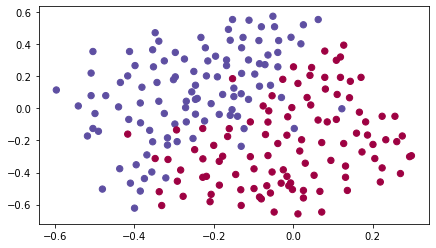

In [2]:
train_X,train_Y,test_X,test_Y=load_2D_dataset()

In [3]:
def model(X,Y,learning_rate=0.3,num_iterations=30000,print_cost=True,lambd=0,keep_prob=1):
    'LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.'
    
    grads= {}
    costs= []
    m=X.shape[1]
    layer_dims=[X.shape[0],20,3,1]
    
    parameters=initialize_parameters(layer_dims)
    
    
    for i in range(0,num_iterations):
        if keep_prob==1:
            a3,cache=forward_propagation(X,parameters)
        elif keep_prob<1:  #dropout shutdown
            a3,cache=forward_propagation_with_dropout(X,parameters,keep_prob)
            
        #compute cost
    
        if lambd==0:
            cost=compute_cost(a3,Y)
        else:
            cost=compute_cost_with_regularization(a3,Y,parameters,lambd)
            
        
        if lambd==0 and keep_prob==1:
            grads=backward_propagation(X,Y,cache)
        
        elif lambd!=0:
            grads=backward_propagation_with_regularization(X,Y,cache,lambd)
        elif keep_prob<1:
            grads=backward_propagation_with_dropout(X,Y,cache,keep_prob)
            
        parameters=update_parameters(parameters,grads,learning_rate)
    
        if print_cost and i % 10000 == 0:
            print('cost after iteration {}:{}'.format(i,cost))
        
        if print_cost and i % 1000 == 0:
            costs.append(cost)
        
#plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations(x1,000)')
    plt.title('Learning rate='+str(learning_rate))
    plt.show()
    
    return parameters

> regularization - cross entropy cost + L2 regularization cost

In [4]:
def compute_cost_with_regularization(A3,Y,parameters,lambd):
    m=Y.shape[1]
    W1=parameters['W1']
    W2=parameters['W2']
    W3=parameters['W3']
    
    cross_entropy_cost=compute_cost(A3,Y)
    
    L2_regularization_cost=lambd/(2*m)*(np.sum(np.square(W1))+np.sum(np.square(W2))+np.sum(np.square(W3)))
    
    cost=cross_entropy_cost+L2_regularization_cost
    
    return cost

In [5]:
##check the code
A3,t_Y,parameters=compute_cost_with_regularization_test_case()
cost=compute_cost_with_regularization(A3,t_Y,parameters,lambd=0.1)
print('cost='+str(cost))

cost=1.7864859451590758


In [6]:
##backward propogation ..differentiate L2 regularization

In [7]:
def backward_propagation_with_regularization(X,Y,cache,lambd):
    m=X.shape[1]
    (Z1,A1,W1,b1,Z2,A2,W2,b2,Z3,A3,W3,b3)=cache
    
    dZ3=A3-Y
    dW3=1./m*np.dot(dZ3,A2.T)+(lambd/m)*W3
    db3=1./m*np.sum(dZ3,axis=1,keepdims=True)
    
    dA2=np.dot(W3.T,dZ3)
    dZ2=np.multiply(dA2,np.int64(A2>0))
    dW2=1./m*np.dot(dZ2,A1.T)+(lambd/m)*W2
    db2=1./m*np.sum(dZ2,axis=1,keepdims=True)
    
    dA1=np.dot(W2.T,dZ2)
    dZ1=np.multiply(dA1,np.int64(A1>0))
    dW1=1./m*np.dot(dZ1,X.T)+(lambd/m)*W1
    db1=1./m*np.sum(dZ1,axis=1,keepdims=True)
    
    
    gradients={'dZ3':dZ3,'dW3':dW3,'db3':db3,'dA2':dA2,
              'dZ2':dZ2,'dW2':dW2,'db2':db2,'dA1':dA1,
              'dZ1':dZ1,'dW1':dW1,'db1':db1}
    return gradients

In [8]:
t_X,t_Y,cache=backward_propagation_with_regularization_test_case()

grads=backward_propagation_with_regularization(t_X,t_Y,cache,lambd=0.7)
print('dw1=\n'+str(grads['dW1']))
print('dw2=\n'+str(grads['dW2']))
print('dw3=\n'+str(grads['dW3']))
backward_propagation_with_regularization_test(backward_propagation_with_regularization)

dw1=
[[-0.25604646  0.12298827 -0.28297129]
 [-0.17706303  0.34536094 -0.4410571 ]]
dw2=
[[ 0.79276486  0.85133918]
 [-0.0957219  -0.01720463]
 [-0.13100772 -0.03750433]]
dw3=
[[-1.77691347 -0.11832879 -0.09397446]]


NameError: name 'backward_propagation_with_regularization_test' is not defined

cost after iteration 0:0.6974484493131264
cost after iteration 10000:0.2684918873282239
cost after iteration 20000:0.2680916337127301


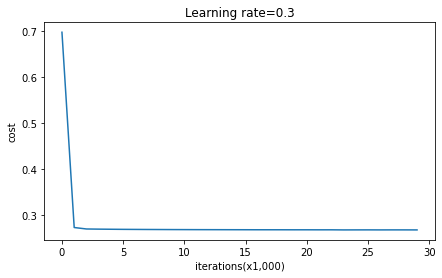

on the training set:
Accuracy: 0.9383886255924171
on the testing set:
Accuracy: 0.93


In [9]:
parameters=model(train_X,train_Y,lambd=0.7)
print('on the training set:')
predict_train=predict(train_X,train_Y,parameters)
print('on the testing set:')
predictions_test=predict(test_X,test_Y,parameters)

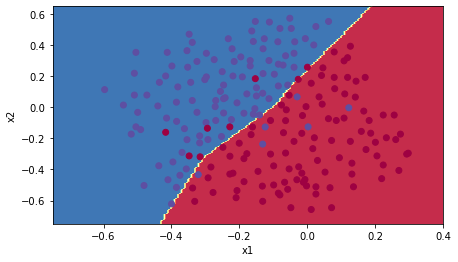

In [10]:
axes=plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x:predict_dec(parameters,x.T),train_X,train_Y)